<a href="https://colab.research.google.com/github/anchalchepurwar/ML_pr/blob/main/ML_PR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving sales_data_sample.csv to sales_data_sample.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

input_file = "sales_data_sample.csv"  # Replace with your input file name
df = pd.read_csv(input_file, encoding="latin1")  # Use the correct encoding


In [ ]:
print("Original Data:")
print(df.head(5))

Original Data:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbay

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())

df = df.dropna()

df['Total Sales'] = df['QUANTITYORDERED'] * df['PRICEEACH']

print("\nUpdated Data with Total Sales:")
print(df.head())



Missing Values:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Updated Data with Total Sales:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
10        10223               37     100.00                1  3965.66   
21        10361               20      72.55               13  1451.00   
40        10270               21     100.00                9  4905.39   
47        10347      

<ipython-input-19-0790a1af08b4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Sales'] = df['QUANTITYORDERED'] * df['PRICEEACH']



Updated data has been exported to Updated_Sales_Data.csv


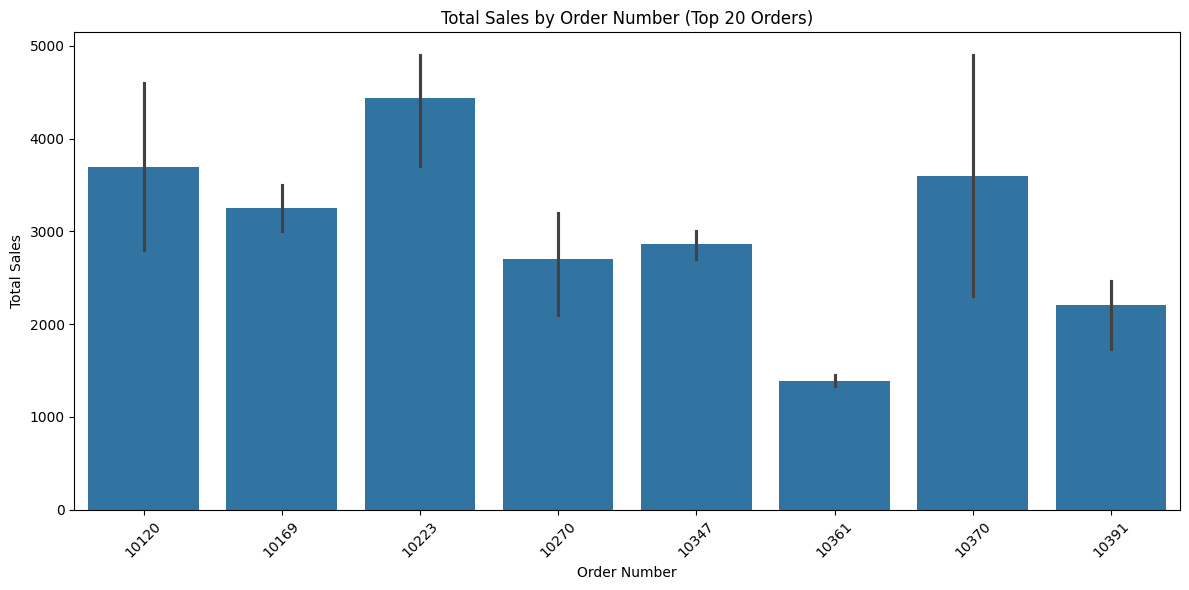

In [ ]:
output_file = "Updated_Sales_Data.csv"
df.to_csv(output_file, index=False)

print(f"\nUpdated data has been exported to {output_file}")

plt.figure(figsize=(12, 6))
sns.barplot(x='ORDERNUMBER', y='Total Sales', data=df.head(20))  # Display top 20 orders for clarity
plt.title("Total Sales by Order Number (Top 20 Orders)")
plt.xlabel("Order Number")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_dataset.csv to Titanic_dataset.csv


<ipython-input-2-5de2ce426a68>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)
<ipython-input-2-5de2ce426a68>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

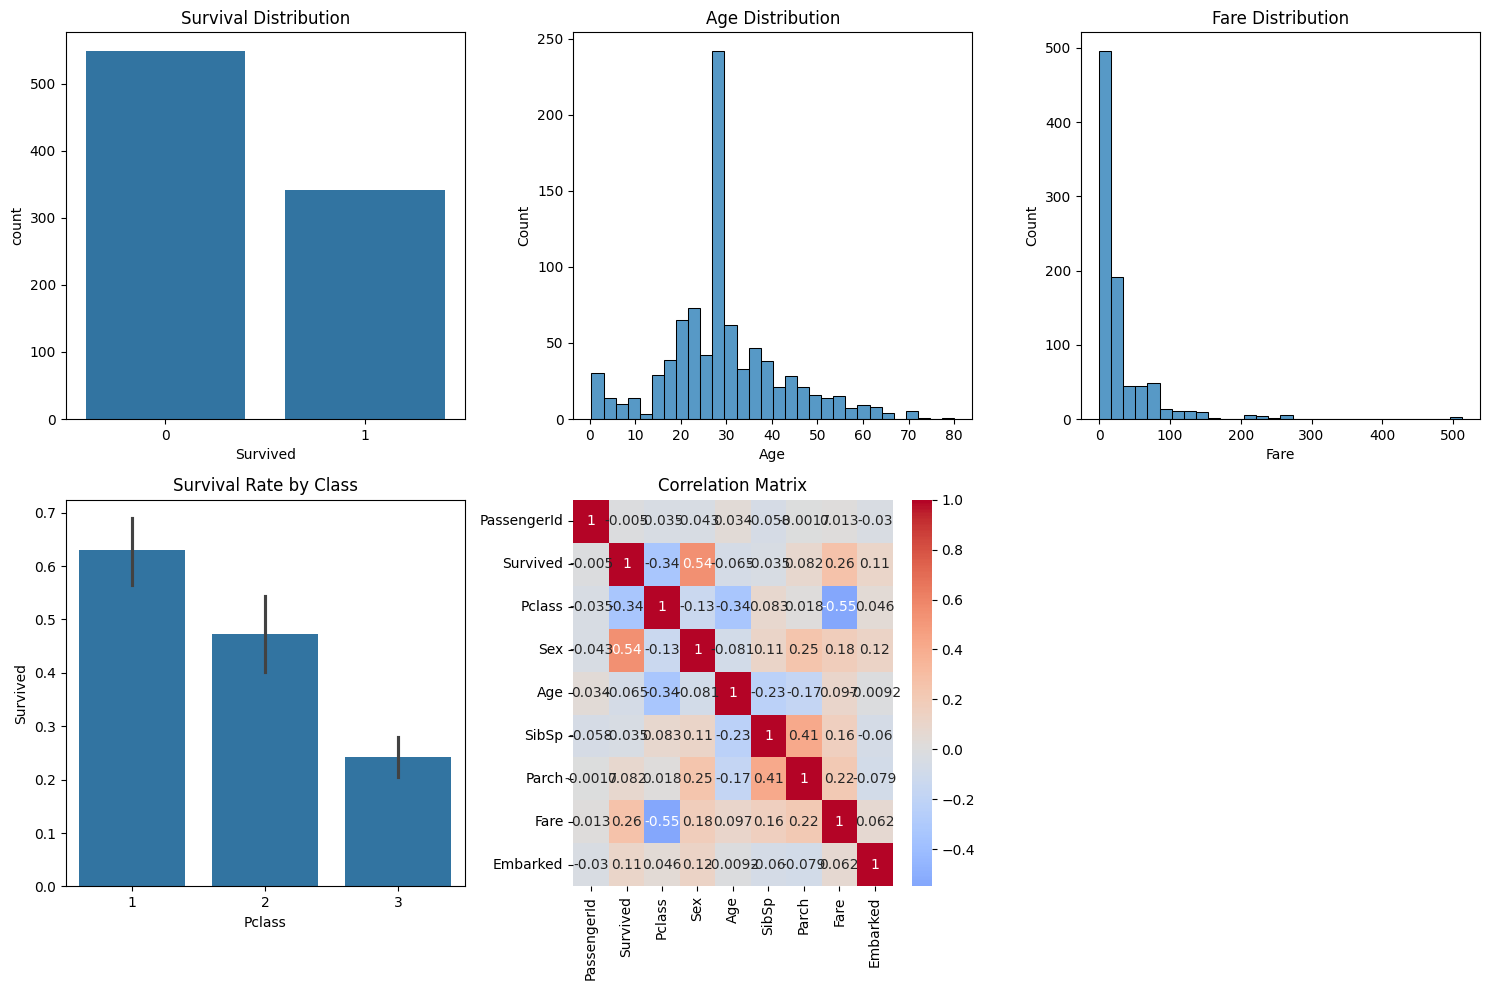

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Import the dataset
df = pd.read_csv('Titanic_dataset.csv')

# Data Cleaning
def clean_data(df):
    # Create a copy of the dataframe
    df_clean = df.copy()

    # Handle missing values
    df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)
    df_clean['Fare'].fillna(df_clean['Fare'].median(), inplace=True)
    df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)

    # Convert categorical variables
    df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})
    df_clean['Embarked'] = df_clean['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

    return df_clean

# Perform EDA
def perform_eda(df):
    # Create a figure for all plots
    plt.figure(figsize=(15, 10))

    # Survival distribution
    plt.subplot(2, 3, 1)
    sns.countplot(data=df, x='Survived')
    plt.title('Survival Distribution')

    # Age distribution
    plt.subplot(2, 3, 2)
    sns.histplot(data=df, x='Age', bins=30)
    plt.title('Age Distribution')

    # Fare distribution
    plt.subplot(2, 3, 3)
    sns.histplot(data=df, x='Fare', bins=30)
    plt.title('Fare Distribution')

    # Survival by class
    plt.subplot(2, 3, 4)
    sns.barplot(data=df, x='Pclass', y='Survived')
    plt.title('Survival Rate by Class')

    # Correlation heatmap
    plt.subplot(2, 3, 5)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix')

    plt.tight_layout()

    return plt.gcf()

# Main analysis
def main():
    # Clean the data
    df_clean = clean_data(df)

    # Perform EDA
    fig = perform_eda(df_clean)

    # Calculate summary statistics
    summary_stats = df_clean.describe()

    # Calculate survival rates by different groups
    survival_by_class = df_clean.groupby('Pclass')['Survived'].mean()
    survival_by_sex = df_clean.groupby('Sex')['Survived'].mean()

    # Export cleaned data
    df_clean.to_csv('titanic_cleaned.csv', index=False)

    return df_clean, summary_stats, survival_by_class, survival_by_sex

# Run the analysis
df_clean, summary_stats, survival_by_class, survival_by_sex = main()